<a href="https://colab.research.google.com/github/macario-glitch/CID-Clasificacion-Inteligente-de-Datos-/blob/main/Hands_On_1_Perceptron/Hands_On_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mario Marquez Garza - 218617269

# Fundamento de la tecnica: **(Perceptrón)**

El perceptrón es un modelo computacional que imita la función básica de una neurona del cerebro humano para realizar tareas de clasificación binaria. Su funcionamiento se basa en recibir un conjunto de entradas, ponderarlas mediante pesos, y decidir una salida aplicando una función de activación.

**Funcionamiento:**

La neurona artificial recibe las variables de entrada: [x1,x2...xn.] (Inputs - Caracteristicas del ejemplo que se desea clasificar.). Es común normalizar o escalar las entradas, con el fin de mejorar el comportamiento del aprendizaje.

Luego, por cada entrada se les multiplica por un peso: [w1,w2...wn.] (Weights - Parametros que representan la importancia de esa entrada para la desición). Los pesos suelen inicializarse con valores pequeños y aleatorios.

Posteriormente se suma todo y se añade un umbral o sesgo (Bias - Es un término independiente que desplaza el hiperplano, evitando que la frontera de separación esté forzosamente anclada en el origen.)

Finalmente el resultado pasa por una función de activación para ver si la neurona se activa[1] o no[0]. (Clase).

Si la predicción es incorrecta, los pesos se ajustan en la dirección que reduce el error. (Tasa de aprendizaje - Escala el tamaño de las actualizaciones de peso.) Tasa alta (rápido, pero inestable), Tasa baja (más estable, pero lento). Se empieza con valores 0.1 o 0.001, luego se ajusta.

# Modelo matematico del perceptrón

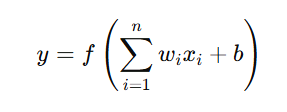

La cual:

**y:** Es la salida (0 o 1).

**f:** Es la función de activación.

**xi:** Es la entrada i.

**wi:** Es el peso asociado a la entrada i.

**b:** Es el sesgo o bias.

**Función escalón:**

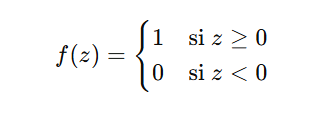

La cual:

**z:** Suma de todo.

**La forma en la que aprende el perceptrón: (Si es que hubo error)**

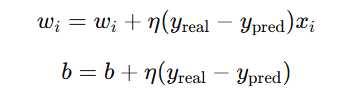

La cual:

**η:** Tasa de aprendizaje.

**y(real):** Valor esperado.

**y(pred):** Valore predicho.

**Feature Enginnering**

In [29]:
from sklearn.datasets import load_breast_cancer #Cargar el dataset.
from sklearn.linear_model import Perceptron #Importar el modelo del Perceptron.
from sklearn.model_selection import train_test_split #Dividir los datos en conjuntos de entrenamiento y prueba de forma aleatoria.
from sklearn.metrics import accuracy_score #Funciones para evaluar la precisión del modelo (Proporcion de predicciones correctas).
from sklearn.preprocessing import StandardScaler #Estandarizar/Normalizar los datos del dataset para mejora el rendimiento.
import numpy as np
import pandas as pd

cancer = load_breast_cancer()
X = cancer.data #Variables de entrada (features)
y = cancer.target #Variable de salida (target)

datos = pd.DataFrame(cancer.data, columns=cancer.feature_names)
datos['target'] = y

display(datos.head())

print("\nClases presentes:\n", cancer.target_names, "\n\n","-"*40,"\n")

print("Se cuentan con:", X.shape[0], "registros.\n")
print("Campos del Dataset:", X.shape[1], "\n")
print(cancer.feature_names)
"""El dataset cuenta con 30 campos numericos las cuales furon calculadas a partir
de imagenes digitalizadas de un aspirado con aguja fina (FNA) de masas mamarias.
Describen caracteristicas de los nucleos celulares presentes. (Palabras de la misma
pagina) El perceptron aprenderá a clasificar entre:
0 = Maligno
1 = Benigno"""

#Normalizar las características (Importante para clasificadores lineales)
scaler = StandardScaler()
X = scaler.fit_transform(X)

#División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("\nDatos de entrenamiento:", X_train.shape[0], "\nDatos de prueba:", X_test.shape[0])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Clases presentes:
 ['malignant' 'benign'] 

 ---------------------------------------- 

Se cuentan con: 569 registros.

Campos del Dataset: 30 

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Datos de entrenamiento: 398 
Datos de prueba: 171


**Model Selection**

Razones del por qué emplear un clasificador lineal. *(Perceptrón)*

**Simplicidad y fundamento matematico claro:** Modelo lineal facilmente analizable. Facilita la comprensión y depuración.

Funciona bien cuando las clases son linealmente separable o casi separables.

**Interpretabilidad:** Pesos indican la importancia de cada variable. Explica decisiones del modelo.

**Eficiencia computacional:** Entrenamiento rápido con regla de aprendizaje simple.

In [30]:
#Declaración del modelo.
model = Perceptron(
    max_iter=1000,      #Numero máximo de iteraciones de entrenamiento.
    eta0=0.1,           #Tasa de aprendizaje inicial.
    random_state=42,    #Semilla para reproducibilidad.
    tol=1e-3  #0.001    #Criterio de parada. (Si la mejora de rendimiento es menor que este valor, el entrenamiento se detiene)
)

**Model Training**

In [31]:
#Entrenamiento
model.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

**Prediction**

In [35]:
def probar_patron(modelo, X, y):
    """
    Prueba el modelo con todos los patrones de entrada (X, y)
    y devuelve el número de aciertos e incorrectos.
    """
    y_pred = modelo.predict(X)
    correctos = np.sum(y_pred == y)
    incorrectos = len(y) - correctos

    print(f"Total de muestras evaluadas: {len(y)}")
    print(f"Correctas: {correctos}")
    print(f"Incorrectas: {incorrectos}")

    return correctos, incorrectos

#Probar el modelo con el conjunto de prueba
correctos, incorrectos = probar_patron(model, X_test, y_test)

Total de muestras evaluadas: 171
Correctas: 164
Incorrectas: 7


**Model Evaluation**

In [37]:
#Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

#Se calcula la métrica Accuracy (exactitud)
accuracy = accuracy_score(y_test, y_pred)

print("\nEvaluación del Modelo")
print("-" * 40)
print(f"Accuracy (Precisión): {accuracy:.3f}")

#Breve explicación:
#La métrica Accuracy mide el porcentaje de aciertos del modelo.
#Valores cercanos a 1.0 (100%) indican que el perceptrón clasifica correctamente la mayoría de los casos de prueba (benignos y malignos).
#Ya que se obtuvó un valor alto, significa que la separación lineal entre clases es buena.


Evaluación del Modelo
----------------------------------------
Accuracy (Precisión): 0.959


# Referencias bibliograficas:

Ia, E. O.-. C. (2025, April 29). El perceptrón en la inteligencia artificial. Qué es y cómo funciona - Consultores IA. Consultores IA. https://consultoresia.com/el-perceptron-en-la-inteligencia-artificial-que-es-y-como-funciona/

Ligdieli. (2021, October 5). ¿Qué es el Perceptrón? Perceptrón Simple y Multicapa - AprendeIA. AprendeIA. https://aprendeia.com/2021/10/05/que-es-el-perceptron-simple-y-multicapa/

UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Electrónica y Tecnología. (2022, June 10). Perceptrón - Machine Learning | aprendizaje automático [Video]. YouTube. https://www.youtube.com/watch?v=e9JYMng977Q